# Project: Wrangle and Analyze WeRateDogs Twitter data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#gather">Data Gathering</a></li>
        <li><a href="#assess">Data Assessing</a></li>
        <li><a href="#clean">Data Cleaning</a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs) dataset will be wrangled. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because ["they're good dogs Brent."](http://knowyourmeme.com/memes/theyre-good-dogs-brent). WeRateDogs has over 9 million followers and has received international media coverage and popular posts are re-posted on Instagram and Facebook. Our goal is, wrangle WeRateDogs Twitter data to create interesting and "Wow!"-worthy analyses and visualizations.

**Questions**:
<ul>
<li><a href="#twt_breed">Most tweeted dog breeds</a></li>
<li><a href="#twt_stage">Most tweeted dog stages</a></li>
<li><a href="#ret_fav">Relationship between retweet and favorite counts</a></li>   
</ul>    

In [1]:
# Import all necessary packages
import numpy as np
import pandas as pd
import os
import requests
#import tweepy
#from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Magic word to visualize plots in the notebook
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> The Data Wrangling process contains below steps 
> - Data Gathering
> - Data Assessing
> - Data Cleaning

<a id='wrangling'></a>
### Data Gathering

#### Enhanced Twitter Archive

Download `twitter_archive_enhanced.csv` from [Twitter archive](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv) provided by Udacity which contains basic tweet data (tweet ID, timestamp, text, etc.) 

In [2]:
# Create data folder to store all data files
if not os.path.exists('data'):
    os.makedirs('data')

In [3]:
# Get response from Twitter archive data url using requests library
archive_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
response = requests.get(archive_url)

# Write Twitter archive data response into csv file
with open('data/twitter-archive-enhanced.csv', 'wb') as file:
    file.write(response.content)
    
# Read data from csv file and Load it into dataframe    
archive_df = pd.read_csv('data/twitter-archive-enhanced.csv')

#### Image Predictions File

Download `image_predictions.tsv` from [image-predictions](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) provided by Udacity which contains table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction

In [4]:
# Get response from image-predictions url using requests library
img_pred_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(img_pred_url)

# Write image-predictions response into tsv file
with open('data/image-predictions.tsv', 'wb') as file:
    file.write(response.content)

# Read data from tsv file and Load it into dataframe        
img_predict_df = pd.read_csv('data/image-predictions.tsv', sep = '\t')

#### Additional Data via the Twitter API
Data retrieved via the twitter API provided by Udacity was accessed and converted to csv from json using an online resource and analyzed.

In [5]:
# Read data from csv file and Load it into dataframe    
tweet_api_df = pd.read_csv('data/tweet_api_json.csv', low_memory=False)

#### ASSESS

#### Visual Assessment

Each piece of gathered data assessed manually to identify **Quality** and **Tidiness issues** using Jupyter Notebook and other external applications like excel

In [6]:
# Twitter Archive Data
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None



> - Rating numerator and denominator has strange values
> - NaN in multiple columns
> - Reply and Retweet columns are present. **We only want original ratings (no retweets) that have images**
> - Individual columns for dog stages
> - Url present in both tweet `text` and `expanded_urls` which are same.

In [7]:
# Image Predictions Data
img_predict_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


> - Contains three set of image predictions including **False** predictions eg. 2074
> - Predicted dog names contains difference kinds of casing.
> - Inconsistent use of hyphens and underscores in the prediction column

In [8]:
# Twitter API Data
tweet_api_df

,tweet_id,favorite_count,retweet_count
0,892420643555336193,34559,7199
1,892177421306343426,29964,5407
2,891815181378084864,22540,3572
3,891689557279858688,37788,7416
4,891327558926688256,36089,7963
...,...,...,...
2323,666049248165822465,92,37
2324,666044226329800704,252,118
2325,666033412701032449,103,37
2326,666029285002620928,116,40


#### Programmatic Assessment

Assessing data using pandas functions and methods

#### Archive

In [9]:
# Brief summary of DataFrame to check missing or possibly errant data
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> - Erreneous datatypes:
    - `tweet_id` *int64* instead of *string*
    - `timestamp` *object* instead of *datetime*

In [10]:
# Check for duplicate instances
archive_df.duplicated().sum()

0

No duplicates and hence 0 was returned

In [11]:
# Check for missing values in Dataset
archive_df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

> - `Retweet`, `expanded_urls`,  `Reply` columns have null values

In [12]:
# Check number of unique elements
archive_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [13]:
# Check reply_to_status_id unique value counts of null and non null values
archive_df.in_reply_to_status_id.notna().value_counts()

False    2278
True       78
Name: in_reply_to_status_id, dtype: int64

In [14]:
# Check retweeted_status_id unique value counts of null and non null values
archive_df.retweeted_status_id.notna().value_counts()

False    2175
True      181
Name: retweeted_status_id, dtype: int64

> - From the data retrived from twitter api,   **2175** columns are having original ratings that have images

In [15]:
# Check source unique values and counts
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

> - Source not extracted properly from hyperlink tag

In [16]:
# Check expanded url unique value counts of null and non null values
archive_df.expanded_urls.isna().value_counts()

False    2297
True       59
Name: expanded_urls, dtype: int64

In [17]:
# Concise summary statistics of numerical columns in DataFrame
archive_df[[ 'rating_denominator','rating_numerator' ]].describe()

,rating_denominator,rating_numerator
count,2356.000000,2356.000000
mean,10.455433,13.126486
std,6.745237,45.876648
min,0.000000,0.000000
25%,10.000000,10.000000
50%,10.000000,11.000000
75%,10.000000,12.000000
max,170.000000,1776.000000


> - Some rating numerators and denominator are suspicious

Let's find out the rows which are having rating_numerator greater than 14 and rating_denominator is not equal to 10 and verify them with tweet text

In [18]:
# Use set option expand the output display of text
pd.set_option('display.max_colwidth', None)

# Display full text to verify starnge values in rating_numerator and rating_denominator
# where rating_numerator greater than 14 and rating_denominator is not equal to 10
text_display = archive_df.query('rating_numerator > 14 or rating_denominator != 10')[['tweet_id', 'text','rating_numerator', 'rating_denominator']]
text_display

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
285,838916489579200512,RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,15,10
290,838150277551247360,@markhoppus 182/10,182,10
...,...,...,...,...
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10
1779,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120
1843,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88,80
2074,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10


> - The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
> - Some Rating numerator and denominator not matching with the tweet text
> - Decimal ratings are present for some tweets which is not matching with Rating numerator and denominator
> - Rating numerator and denominator can be converted from int to float as the ratings have decimal values.

In [19]:
# Get unique values
archive_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

> - Some values in the name column are None
> - And 'a' is not a name.

In [20]:
# Unique dog names
archive_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

> - Some of the unique names returned are stop words such as 'a', 'none'etc.
> - Some of the unique names returned are starting in lower cases

In [21]:
# Count all names containing lower cases and stop words
archive_df.name[archive_df.name.str.islower()].value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [22]:
# number of unique values for each dog stages
archive_df[['doggo', 'floofer', 'pupper', 'puppo']].apply(pd.Series.value_counts)

,doggo,floofer,pupper,puppo
None,2259.0,2346.0,2099.0,2326.0
doggo,97.0,NaN,NaN,NaN
floofer,NaN,10.0,NaN,NaN
pupper,NaN,NaN,257.0,NaN
puppo,NaN,NaN,NaN,30.0


> - Individual dog stages are having lot of none values which can be arranged into a single column.

#### Image Prediction

In [23]:
# Brief summary of DataFrame to check missing or possibly errant data for image prediction 
img_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> - Erreneous datatype for `tweet_id` *int64* instead of *string*

In [24]:
# check for duplicate data
img_predict_df.duplicated().sum()

0

In [25]:
# check null values
img_predict_df.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [26]:
# number of unique elements in image predictions
img_predict_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [27]:
# number of unique values in each dog breed
img_predict_df[['p1_dog', 'p2_dog', 'p3_dog']].apply(pd.Series.value_counts)

,p1_dog,p2_dog,p3_dog
True,1532,1553,1499
False,543,522,576


p1_dog has the highest number of true predictions

In [28]:
# Concise summary statistics of prediction confidence levels
img_predict_df[['p1_conf', 'p2_conf', 'p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


> - Most confident image predictions are enough

#### Tweets

In [29]:
# Brief summary of DataFrame to check missing or possibly errant data
tweet_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2328 non-null   int64
 1   favorite_count  2328 non-null   int64
 2   retweet_count   2328 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


> - Erreneous datatype for `tweet_id` *int64* instead of *string*

In [30]:
# check for duplicated values
tweet_api_df.duplicated().sum()

0

In [31]:
# check for null values
tweet_api_df.isna().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

In [32]:
# Concise summary statistics of retweet and favourite count
tweet_api_df[['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,2328.000000,2328.000000
mean,2540.862543,7216.152921
std,4302.075518,11207.555180
min,1.000000,0.000000
25%,512.000000,1254.750000
50%,1183.000000,3124.500000
75%,2939.750000,8809.750000
max,72852.000000,148224.000000


**Check for duplicated columns in gathered datasets**

In [33]:
all_columns = pd.Series(list(archive_df) + list(img_predict_df) + list(tweet_api_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

> - `tweet_id` column is duplicated in gathered datasets
> - These three datasets can be combined into one single dataframe to improve tidiness

### Observations of Data Assessment

### Quality Issues:
#### Twitter Archive Data
- Erreneous datatypes: `tweet_id`, `timestamp`
- **Retweet** and **Reply** observations present along with original tweet ratings
- Unwanted columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`
- Source not extracted properly from hyperlink tag
- Rating numerator and denominator can be converted from int to float as the ratings have decimal values
- Unstandardized ratings:
    - Some Rating numerator and denominator are not matching with the tweet text
    - Some tweets doesn't having ratings
    - Decimal ratings are present for some tweets which is not matching with Rating numerator and denominator
- Ambiguous names present
- **&amp ;** and **\n** codes directly present in tweet text
- Url present in both tweet `text` and `expanded_urls`

#### Image Predictions Data
- Erreneous datatype `tweet_id`
- Predicted dog names contains difference kinds of casing
- Dog breed contains underscore and hyphen characters

#### Twitter API Data
- Erreneous datatype `tweet_id`  

### Tidiness Issues:
#### Twitter Archive Data
- Individual columns for dog stages (`doggo`, `floofer`, `pupper`, `puppo`) which shoule be combined into single column **Dog stages**

#### Image Predictions Data
- Most confident image predictions are enough. Contains three set of image predictions including False predictions

#### General
- `tweet_id` column is duplicated in gathered datasets(`archive`, `img_pred`, `tweet_api`). Gathered three datasets can be combined into one single dataframe to improve tidiness

<a id='clean'></a>
### Data Cleaning

To make the high quality and tidy datasets, assessed quality and tidiness issues needs to be fixed.

**Before cleaning, make copy of original datasets**

In [34]:
archive_clean = archive_df.copy()
pred_clean = img_predict_df.copy()
tweet_clean = tweet_api_df.copy()

Data cleaning process has below three steps:
- Define
- Code
- Test

**Issue 1:** 

**Define**
- Remove retweets and replys observations in `archive_clean` by ignoring the rows which has values for `retweeted_status_id` and `in_reply_to_status_id` using 'isna' method 

**code**

In [35]:
# Slice the rows which doesn't have reply and retweet observations
archive_clean = archive_clean[(archive_clean.retweeted_status_id.isna() == True) & (archive_clean.in_reply_to_status_id.isna() == True)]

**Test**

In [36]:
# Check retweet and reply observations are dropped
assert archive_clean.retweeted_status_id.notna().sum() == 0 & archive_clean.in_reply_to_status_id.notna().sum() == 0

**Issue 2:** 

**Define**
- Drop unwanted columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` from `archive_clean`

**Code**

In [37]:
# Drop reply and retweet features
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis = 1 , inplace = True)

**Test**

In [38]:
# Confirm 'reply' and 'retweet' columns are dropped
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

**Issue 3:**  

**Define**
- Combine individual dog stages columns (doggo, floofer, pupper, puppo) into single column `dog_stages`

**Code**

In [39]:
# Function to replace 'None' and 'NAN' values with empty string
def null_none_replace(stage):
    for typ in range(0, len(stage)):
        # replace function to replace 'None' and 'NAN' values
        archive_clean[stage[typ]].replace('None', '', inplace=True)
        archive_clean[stage[typ]].replace(np.NaN, '', inplace=True)

# dog stages list        
dog_stage_list = ['doggo', 'floofer', 'pupper', 'puppo']

# call null_none_replace function
null_none_replace(dog_stage_list)

# Create 'dog_stages' column by adding all the individual columns 'doggo', 'floofer', 'pupper', 'puppo'  
archive_clean['dog_stages'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# To avoid missing values, Lets replace empty string with 'None'
archive_clean.dog_stages.replace('', 'None', inplace=True)
archive_clean.dog_stages.value_counts()

None            1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stages, dtype: int64

> - Some rows contains multiple dog stages `doggopupper`, `doggofloofer`, `doggopuppo`

In [40]:
# seperate the multiple stages name by comma 
archive_clean.loc[archive_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo,pupper'
archive_clean.loc[archive_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo,floofer'
archive_clean.loc[archive_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo,puppo'

# drop the individual columns 'doggo', 'floofer', 'pupper', 'puppo'  
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1 , inplace = True)

**Test**

In [41]:
# verify individual dog stages columns are deleted
assert archive_clean.columns.all() not in dog_stage_list

In [42]:
# display the value_counts
archive_clean.dog_stages.value_counts()

None             1761
pupper            221
doggo              72
puppo              23
floofer             9
doggo,pupper        9
doggo,puppo         1
doggo,floofer       1
Name: dog_stages, dtype: int64

**Issue 4:**  

**Define**
- Find most confident `TRUE` image predictions and ignore the observations which has `False` predictions 

**Code**

In [43]:
# 'pred_clean' contains only the top three predictions in sorted 
# empty list to store best breed and confidence
breed = []
confidence = []

# Function to  find best prediction by only considering the predictions for which the dog prediction is true
# 
def high_breed_conf(row):
    if row.p1_dog == True:
        breed.append(row.p1)
        confidence.append(row.p1_conf)
    elif row.p2_dog == True:
        breed.append(row.p2)
        confidence.append(row.p2_conf)
    elif row.p3_dog == True:
        breed.append(row.p3)
        confidence.append(row.p3_conf)
    else:
        breed.append("Not Predicted")
        confidence.append(0)

# call high_breed_conf to get best prediction
pred_clean.apply(high_breed_conf, axis = 1)

# create new columns 'breed' and 'confidence' and assign the fount best predicted breed and confidence list
pred_clean['breed'] = breed
pred_clean['confidence'] = confidence

# drop the unwanted columns
pred_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1 , inplace = True)

**Test**

In [44]:
# Check breed and confidence columns
pred_clean.sample(9)

,tweet_id,jpg_url,breed,confidence
349,672482722825261057,https://pbs.twimg.com/media/CVUjd14W4AE8tvO.jpg,West_Highland_white_terrier,0.586173
931,703079050210877440,https://pbs.twimg.com/media/CcHWqQCW8AEb0ZH.jpg,Pembroke,0.778503
619,680440374763077632,https://pbs.twimg.com/ext_tw_video_thumb/680440290977693696/pu/img/B900g7b-n-zhnwi5.jpg,Not Predicted,0.000000
41,666701168228331520,https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg,Labrador_retriever,0.887707
1278,750101899009982464,https://pbs.twimg.com/media/Cmjlsh1XgAEvhq_.jpg,golden_retriever,0.316704
1542,791312159183634433,https://pbs.twimg.com/media/CvtONV4WAAAQ3Rn.jpg,miniature_pinscher,0.892925
852,695816827381944320,https://pbs.twimg.com/media/CagJtjYW8AADoHu.jpg,Pomeranian,0.382234
1589,798628517273620480,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,beagle,0.636169
1661,811744202451197953,https://pbs.twimg.com/media/C0PlCQjXAAA9TIh.jpg,Pekinese,0.386082


In [45]:
# verify unwanted predictions columns are deleted
pred_clean.columns

Index(['tweet_id', 'jpg_url', 'breed', 'confidence'], dtype='object')

In [46]:
# check for value_counts
pred_clean.breed.value_counts()

Not Predicted           324
golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: breed, Length: 114, dtype: int64

**Issue 5:**  

**Define**
- Merge gathered datasets into single dataframe `twitter_data_cleaned`and drop duplicate columns

In [47]:
# Use the pandas merge function to merge all the three dataframes on tweet_id
twitter_data_cleaned = pd.merge(archive_clean, tweet_clean, how = 'left', on = ['tweet_id'])
twitter_data_cleaned = pd.merge(twitter_data_cleaned, pred_clean, how = 'left', on = ['tweet_id'])

**Test**

In [48]:
# check duplicated column `tweet_id` is dropped
twitter_data_cleaned.columns 

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages',
       'favorite_count', 'retweet_count', 'jpg_url', 'breed', 'confidence'],
      dtype='object')

In [49]:
# display merge dataframe
twitter_data_cleaned.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,favorite_count,retweet_count,jpg_url,breed,confidence
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,34559.0,7199.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Not Predicted,0.000000
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,29964.0,5407.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,22540.0,3572.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,37788.0,7416.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,36089.0,7963.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


**Issue 6:**  

**Define**
- Convert `timestamp` from object to datetime
- Erreneous datatypes: `tweet_id`, `timestamp`
- Convert `tweet_id` from int to string

**Code**

In [50]:

# use pandas to_datetime method to convert timestamp datatype
twitter_data_cleaned.timestamp = pd.to_datetime(twitter_data_cleaned.timestamp)

# use astype to change data type from int to string
twitter_data_cleaned.tweet_id = twitter_data_cleaned.tweet_id.astype(str)


**Test**

In [51]:
#  perform unit tests using isintance method to verify erreneous datatypes are corrected
assert isinstance(twitter_data_cleaned.timestamp[0], pd.Timestamp) 
assert isinstance(twitter_data_cleaned.tweet_id[0], str)

**Issue 7:** 

**Define**
- Extract source from hyperlink tag properly and remove html tags

**Code**

In [52]:
# Fuction to extract source by removing all html tags by replacing them with empty string using 're.sub' method
def extract_source(source):
    result = re.sub('<.*?>', '', source)
    return result

# Call extract_source function
twitter_data_cleaned['source'] = twitter_data_cleaned['source'].apply(lambda x : extract_source(x))

**Test**

In [53]:
# check html tags are removed
twitter_data_cleaned.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

**Issue 8:** 

**Define**
- Convert `rating_numerator` and `rating_denominator` from int to float as the ratings have decimal values

**Code**

In [54]:
# use astype to change data type from int to float
twitter_data_cleaned.rating_numerator = twitter_data_cleaned.rating_numerator.astype(float)
twitter_data_cleaned.rating_denominator = twitter_data_cleaned.rating_denominator.astype(float)

**Test**

In [55]:
# verify datatypes are convertion to float using the isinstance method
assert isinstance(twitter_data_cleaned.rating_numerator[0], float) 
assert isinstance(twitter_data_cleaned.rating_denominator[0], float)

**Issue 9:** 

**Define**
- Correct the ambiguous name present in the dataframe

**Code**

In [56]:
# use string regex to find the names which islower and replace it with 'None'
twitter_data_cleaned.name = twitter_data_cleaned.name.str.replace('^[a-z]+', 'None', regex=True)

**Test**

In [57]:
# check whether the dataframe has lowercase names
assert twitter_data_cleaned.name.str.islower().all() == False

**Issue 10:** 

**Define**
- Correct the dog breed which contains underscore and hyphen characters

**Code**

In [58]:
# replace underscore and hyphen with empty string in the 
twitter_data_cleaned.breed = twitter_data_cleaned.breed.str.replace('_', ' ', regex=True)
twitter_data_cleaned.breed = twitter_data_cleaned.breed.str.replace('-', ' ', regex=True)

**Test**

In [59]:
# check whether '-' and '_' were remove from the dog breeds
twitter_data_cleaned.breed.unique()

array(['Not Predicted', 'Chihuahua', 'Labrador retriever', 'basset',
       'Chesapeake Bay retriever', 'Appenzeller', 'Pomeranian',
       'Irish terrier', 'Pembroke', 'Samoyed', 'French bulldog',
       'golden retriever', 'whippet', 'Siberian husky',
       'Mexican hairless', 'kuvasz', 'pug', 'Blenheim spaniel', nan,
       'malamute', 'Italian greyhound', 'chow', 'German shepherd',
       'Doberman', 'Eskimo dog', 'Weimaraner', 'Saluki',
       'miniature pinscher', 'German short haired pointer',
       'English springer', 'vizsla', 'bloodhound', 'Bernese mountain dog',
       'West Highland white terrier', 'cocker spaniel',
       'flat coated retriever', 'Cardigan', 'Newfoundland',
       'Shetland sheepdog', 'komondor', 'kelpie',
       'Greater Swiss Mountain dog', 'Border collie', 'bull mastiff',
       'Staffordshire bullterrier', 'Australian terrier',
       'Bouvier des Flandres', 'Bedlington terrier', 'Boston bull',
       'black and tan coonhound', 'Great Dane', 'standar

**Issue 11:** 

**Define**
- Correct the dog breed string casing 

**Code**

In [60]:
# Use string title method to capitalize each word presend in each breed name
twitter_data_cleaned.breed = twitter_data_cleaned.breed.str.title()

**Test**

In [61]:
# verify whether dog breed string casing corrected or not
twitter_data_cleaned.breed.unique()

array(['Not Predicted', 'Chihuahua', 'Labrador Retriever', 'Basset',
       'Chesapeake Bay Retriever', 'Appenzeller', 'Pomeranian',
       'Irish Terrier', 'Pembroke', 'Samoyed', 'French Bulldog',
       'Golden Retriever', 'Whippet', 'Siberian Husky',
       'Mexican Hairless', 'Kuvasz', 'Pug', 'Blenheim Spaniel', nan,
       'Malamute', 'Italian Greyhound', 'Chow', 'German Shepherd',
       'Doberman', 'Eskimo Dog', 'Weimaraner', 'Saluki',
       'Miniature Pinscher', 'German Short Haired Pointer',
       'English Springer', 'Vizsla', 'Bloodhound', 'Bernese Mountain Dog',
       'West Highland White Terrier', 'Cocker Spaniel',
       'Flat Coated Retriever', 'Cardigan', 'Newfoundland',
       'Shetland Sheepdog', 'Komondor', 'Kelpie',
       'Greater Swiss Mountain Dog', 'Border Collie', 'Bull Mastiff',
       'Staffordshire Bullterrier', 'Australian Terrier',
       'Bouvier Des Flandres', 'Bedlington Terrier', 'Boston Bull',
       'Black And Tan Coonhound', 'Great Dane', 'Standar

In [62]:
twitter_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   float64            
 7   name                2097 non-null   object             
 8   dog_stages          2097 non-null   object             
 9   favorite_count      2089 non-null   float64            
 10  retweet_count       2089 non-null   float64            
 11  jpg_url             1971 non-null   object             
 12  breed               1971 non-null 

**Storing combined and cleaned Dataset :**

In [63]:
twitter_data_cleaned.to_csv('data/twitter_archive_master.csv', encoding='utf-8', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

In [64]:
# Read data from csv file and Load it into dataframe and print first n rows
df = pd.read_csv('data/twitter_archive_master.csv')
df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,favorite_count,retweet_count,jpg_url,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,34559.0,7199.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Not Predicted,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,29964.0,5407.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581


In [65]:
# Create visualizations folder to store plot images
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

<a id='twt_breed'></a>
### Research Question 1: Most tweeted dog breeds

In [66]:
# ignore the breeds which are 'Not Predicted'
breed_df = df[df.breed != 'Not Predicted']

# unique dog breeds count
counts = breed_df.breed.value_counts(ascending=True)
counts

Irish Wolfhound         1
Standard Schnauzer      1
Japanese Spaniel        1
Entlebucher             1
Scotch Terrier          1
                     ... 
Pug                    62
Chihuahua              90
Pembroke               94
Labrador Retriever    106
Golden Retriever      156
Name: breed, Length: 113, dtype: int64

**From the above output, it's obvious dog breed contains outliers. We remove the outliers based the mean valuecount** 

In [67]:
# value_counts mean
mean = breed_df.breed.value_counts().mean()
mean

14.743362831858407

In [68]:
# take the dog breed which is tweeted altleast 14 times
breed_df = breed_df.loc[df.breed.isin(counts.index[counts > mean])]
breed_df.breed.value_counts()

Golden Retriever                  156
Labrador Retriever                106
Pembroke                           94
Chihuahua                          90
Pug                                62
Toy Poodle                         50
Chow                               48
Samoyed                            42
Pomeranian                         41
Malamute                           33
Chesapeake Bay Retriever           31
French Bulldog                     31
Cocker Spaniel                     30
Miniature Pinscher                 24
Eskimo Dog                         22
Cardigan                           21
German Shepherd                    21
Siberian Husky                     20
Staffordshire Bullterrier          20
Beagle                             20
Shih Tzu                           20
Maltese Dog                        19
Shetland Sheepdog                  18
Rottweiler                         18
Italian Greyhound                  17
Kuvasz                             17
Basset      

In [69]:
# find average dog breed count according to top 10 breeds
dog_breed = breed_df.groupby('breed').agg(count=('breed','count')).reset_index()
dog_breed = dog_breed.sort_values('count', ascending = False).head(10)
dog_breed

,breed,count
11,Golden Retriever,156
15,Labrador Retriever,106
20,Pembroke,94
5,Chihuahua,90
22,Pug,62
29,Toy Poodle,50
6,Chow,48
24,Samoyed,42
21,Pomeranian,41
17,Malamute,33


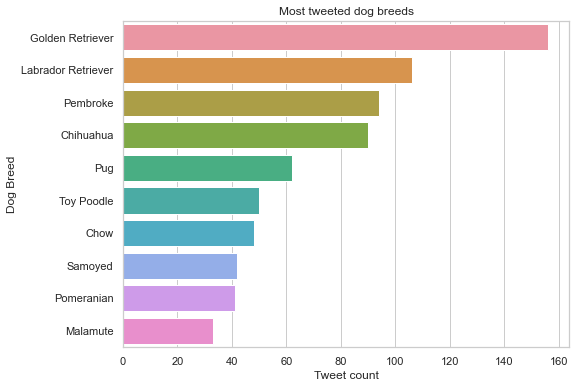

In [70]:
# set background theme
sns.set_theme(style="whitegrid")
plt.style.use('seaborn-pastel')
plt.figure(figsize=(8,6))

# plot the results
sns.barplot(y = 'breed', x = 'count', data = dog_breed);

# set plot properties
plt.title('Most tweeted dog breeds');
plt.xlabel('Tweet count')
plt.ylabel('Dog Breed');

# store the plot
plt.savefig('visualizations/top_breeds.jpg', bbox_inches='tight');

- Most tweeted `Dog Breed`: **Golden Retriever**

### Research Question 2: Most tweeted dog stages

In [71]:
# ignore the stages which are 'None'
stage_df = df[(df.dog_stages != 'None')]

# find average dog breed count and select top 10 breeds
dog_stage = stage_df.groupby('dog_stages').agg(count=('dog_stages','count')).reset_index()
dog_stage

,dog_stages,count
0,doggo,72
1,"doggo,floofer",1
2,"doggo,pupper",9
3,"doggo,puppo",1
4,floofer,9
5,pupper,221
6,puppo,23


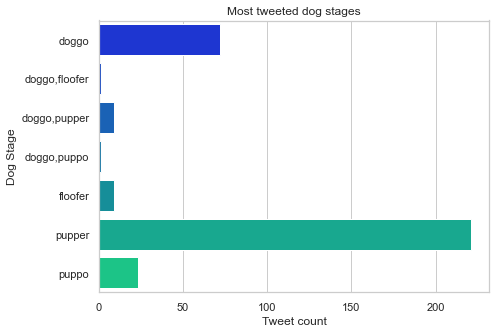

In [72]:
# set figure size
plt.figure(figsize=(7,5))

# plot the results
sns.barplot(x = 'count', y = 'dog_stages', data = dog_stage, palette = ("winter"));

# set plot properties
plt.title('Most tweeted dog stages');
plt.xlabel('Tweet count')
plt.ylabel('Dog Stage');

# store the plot
plt.savefig('visualizations/top_stages.jpg', bbox_inches='tight');

- Most tweeted `Dog Stage`: **pupper**

### Research Question 3: Relationship between retweet count and favorite counts

In [73]:
# get the correlation between retweet and favourite count
df[['retweet_count', 'favorite_count']].corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.925711
favorite_count,0.925711,1.000000


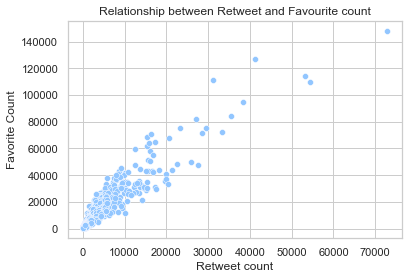

In [74]:
# plot the correlation
sns.scatterplot(x = 'retweet_count', y = 'favorite_count', data = df)

# set plot properties
plt.title('Relationship between Retweet and Favourite count');
plt.xlabel('Retweet count')
plt.ylabel('Favorite Count');

# store the plot
plt.savefig('visualizations/corr_retweet_favo.jpg', bbox_inches='tight');

- Retweet and Favourite count has **highly positive relationship (0.928)**

<a id='conclusions'></a>
## Conclusions

- **Golden Retriever** is the most tweeted Dog Breed
- **pupper** is the most tweeted Dog Stage
- Retweet and Favorite counts has the highly positive relationship between which are the most important features of **Popular** tweets in WeRateDogs with an R of 0.928